# Módulo 10 tarefa 2

Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

1) Com o que você viu em aula, faça uma análise das variáveis qualitativas (posse de imóvel e posse de veículo) para verificar se são boas preditoras de *renda*. Alguma delas parece discriminar *renda* de forma estatisticamente significante?


Distribuição de posse de imóvel:
posse_de_imovel
True     10082
False     4918
Name: count, dtype: int64

Distribuição de posse de veículo:
posse_de_veiculo
False    9167
True     5833
Name: count, dtype: int64


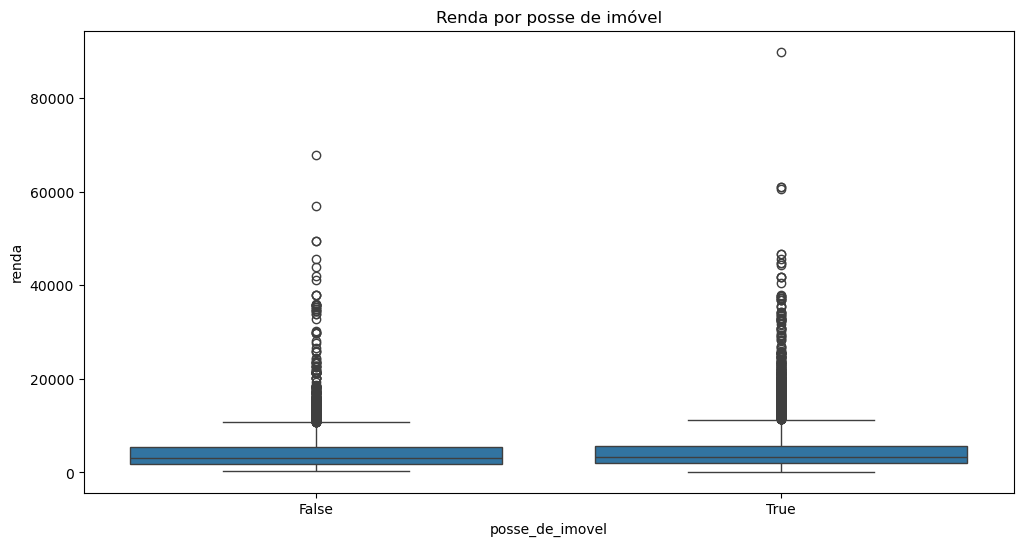

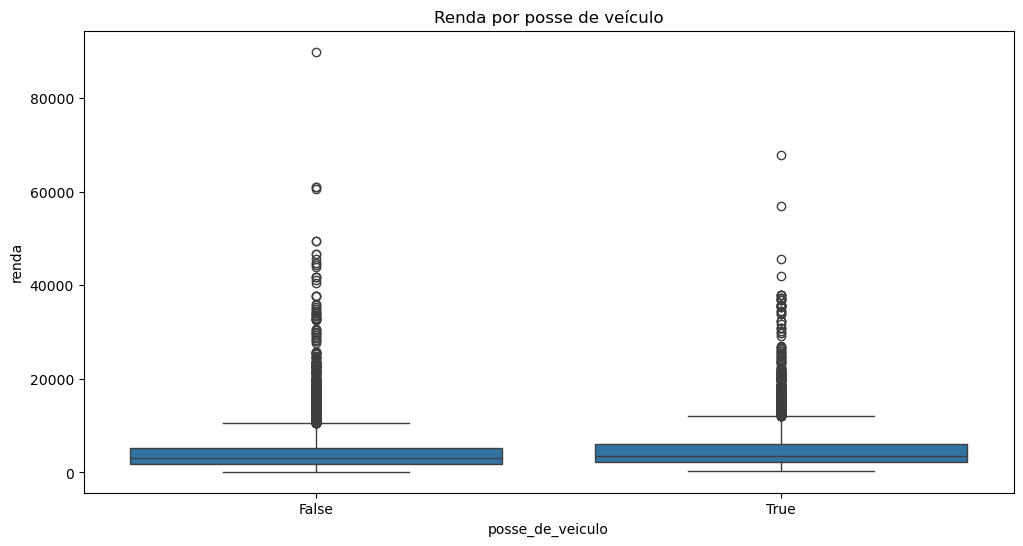


Teste Qui-Quadrado (Posse de Imóvel):
Estatística: 10.504808013348114, p-valor: 0.0011906432902261095

Teste Qui-Quadrado (Posse de Veículo):
Estatística: 71.47800742318368, p-valor: 2.803657582480056e-17

Posse de imóvel discrimina renda de forma estatisticamente significante.

Posse de veículo discrimina renda de forma estatisticamente significante.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

df = pd.read_csv('previsao_de_renda.csv')

print("\nDistribuição de posse de imóvel:")
print(df['posse_de_imovel'].value_counts())
print("\nDistribuição de posse de veículo:")
print(df['posse_de_veiculo'].value_counts())

plt.figure(figsize=(12, 6))
sns.boxplot(x='posse_de_imovel', y='renda', data=df)
plt.title('Renda por posse de imóvel')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='posse_de_veiculo', y='renda', data=df)
plt.title('Renda por posse de veículo')
plt.show()

crosstab_imovel = pd.crosstab(df['posse_de_imovel'], df['renda'] > df['renda'].median())
stat_imovel, p_imovel, _, _ = chi2_contingency(crosstab_imovel)

print("\nTeste Qui-Quadrado (Posse de Imóvel):")
print(f"Estatística: {stat_imovel}, p-valor: {p_imovel}")

crosstab_veiculo = pd.crosstab(df['posse_de_veiculo'], df['renda'] > df['renda'].median())
stat_veiculo, p_veiculo, _, _ = chi2_contingency(crosstab_veiculo)

print("\nTeste Qui-Quadrado (Posse de Veículo):")
print(f"Estatística: {stat_veiculo}, p-valor: {p_veiculo}")

if p_imovel < 0.05:
    print("\nPosse de imóvel discrimina renda de forma estatisticamente significante.")
else:
    print("\nPosse de imóvel NÃO discrimina renda de forma estatisticamente significante.")

if p_veiculo < 0.05:
    print("\nPosse de veículo discrimina renda de forma estatisticamente significante.")
else:
    print("\nPosse de veículo NÃO discrimina renda de forma estatisticamente significante.")
